# Dataset Exploration

## Goal
Understand the structure and format of datasets:
1. TBX11K Simplified
2. Shenzhen
3. Montgomery

## To Do
1. Check dataset locations
2. Understand file organization
3. Examine annotation formats
4. Visualize sample images
5. Count images and check distributions


## Step 1: Set Up Paths

Set up the paths to the datasets.


**Update datasets path in Google Drive:**
- Mount Google Drive
- Update path in the drive


In [1]:
import os
from pathlib import Path
import json
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

# Set up paths
# Mount to Google Drive
# Update path in the drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_ROOT = Path('/content/drive/MyDrive/TB_Segmentation_Data')
    print(f" Using Google Drive (Colab): {DATA_ROOT}")
except:
    # Option 2: Local - Check for Google Drive for Desktop
    drive_path = Path.home() / 'Google Drive' / 'TB_Segmentation_Data'
    local_path = Path('../../data/raw')

    if drive_path.exists():
        DATA_ROOT = drive_path
        print(f" Using Google Drive (Desktop): {DATA_ROOT}")
    elif local_path.exists():
        DATA_ROOT = local_path
        print(f" Using local data directory: {DATA_ROOT}")
    else:
        # Neither found - user needs to set up
        print("  Dataset path not found!")
        print(f"   Checked: {drive_path}")
        print(f"   Checked: {local_path}")
        print("   1. Install Google Drive for Desktop, OR")
        print("   2. Update DATA_ROOT below to your dataset location")
        DATA_ROOT = drive_path  # Default, can update
        print(f"\n   Current path set to: {DATA_ROOT}")

# Dataset paths
TBX11K_PATH = DATA_ROOT / 'tbx11k'
SHENZHEN_PATH = DATA_ROOT / 'shenzhen'
MONTGOMERY_PATH = DATA_ROOT / 'montgomery'

print(f"\n Dataset paths:")
print(f"   TBX11K: {TBX11K_PATH}")
print(f"   Shenzhen: {SHENZHEN_PATH}")
print(f"   Montgomery: {MONTGOMERY_PATH}")


Mounted at /content/drive
 Using Google Drive (Colab): /content/drive/MyDrive/TB_Segmentation_Data

 Dataset paths:
   TBX11K: /content/drive/MyDrive/TB_Segmentation_Data/tbx11k
   Shenzhen: /content/drive/MyDrive/TB_Segmentation_Data/shenzhen
   Montgomery: /content/drive/MyDrive/TB_Segmentation_Data/montgomery


## Step 2: Explore TBX11K Dataset Structure


In [2]:
def explore_directory(path, max_depth=3, current_depth=0):
    """Recursively explore directory structure."""
    if not path.exists():
        print(f"Path does not exist: {path}")
        return

    indent = "  " * current_depth
    print(f"{indent} {path.name}/")

    if current_depth < max_depth:
        try:
            items = sorted(path.iterdir())
            for item in items[:20]:  # Limit to first 20 items
                if item.is_dir():
                    explore_directory(item, max_depth, current_depth + 1)
                else:
                    size = item.stat().st_size / (1024 * 1024)  # MB
                    print(f"{indent} {item.name} ({size:.2f} MB)")
            if len(items) > 20:
                print(f"{indent}  ... and {len(items) - 20} more items")
        except PermissionError:
            print(f"{indent}  Permission denied")

print("=" * 60)
print("TBX11K Dataset Structure")
print("=" * 60)
explore_directory(TBX11K_PATH)


TBX11K Dataset Structure
 tbx11k/
   tbx11k-simplified/
   data.csv (0.55 MB)
     images/
     h0001.png (0.32 MB)
     h0003.png (0.33 MB)
     h0004.png (0.32 MB)
     h0005.png (0.31 MB)
     h0006.png (0.30 MB)
     h0008.png (0.32 MB)
     h0009.png (0.31 MB)
     h0010.png (0.30 MB)
     h0012.png (0.31 MB)
     h0013.png (0.32 MB)
     h0016.png (0.35 MB)
     h0017.png (0.29 MB)
     h0018.png (0.33 MB)
     h0019.png (0.34 MB)
     h0020.png (0.35 MB)
     h0021.png (0.32 MB)
     h0022.png (0.30 MB)
     h0023.png (0.32 MB)
     h0025.png (0.34 MB)
     h0026.png (0.32 MB)
      ... and 8380 more items
     test/
     unknown_1.png (0.32 MB)
     unknown_10.png (0.36 MB)
     unknown_100.png (0.32 MB)
     unknown_1000.png (0.38 MB)
     unknown_1001.png (0.35 MB)
     unknown_1002.png (0.32 MB)
     unknown_1003.png (0.36 MB)
     unknown_1004.png (0.34 MB)
     unknown_1005.png (0.35 MB)
     unknown_1006.png (0.32 MB)
     unknown_1007.png (0.34 MB)
     unknown_1008.png 

Key Findings:

1. Images: PNG format
2. Image size: ~0.3-0.4 MB each
3. Training images: ~8,380 in images/ folder
4. Test images: ~3,282 in test/ folder
5. Annotations: data.csv

## Step 3: Check if data.csv exists

In [3]:
# Check if data.csv exists
data_csv_path = TBX11K_PATH / 'tbx11k-simplified' / 'data.csv'

if data_csv_path.exists():
    print(f" Found: {data_csv_path}")
else:
    print(f" Not found: {data_csv_path}")

 Found: /content/drive/MyDrive/TB_Segmentation_Data/tbx11k/tbx11k-simplified/data.csv


## Step 4: Load and view data.csv

In [4]:
# Load the CSV file
df = pd.read_csv(data_csv_path)

# Explore basic structure (rows, cols, Feature names)
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names:")
print(list(df.columns))

Total rows: 8811
Total columns: 8

Column names:
['fname', 'image_height', 'image_width', 'source', 'bbox', 'target', 'tb_type', 'image_type']


## Step 5: View first few rows

In [5]:
# Show first 10 rows
df.head(10)

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
0,h0001.png,512,512,train,none,no_tb,none,healthy
1,h0003.png,512,512,train,none,no_tb,none,healthy
2,h0005.png,512,512,train,none,no_tb,none,healthy
3,h0008.png,512,512,train,none,no_tb,none,healthy
4,h0009.png,512,512,train,none,no_tb,none,healthy
5,h0010.png,512,512,train,none,no_tb,none,healthy
6,h0012.png,512,512,train,none,no_tb,none,healthy
7,h0013.png,512,512,train,none,no_tb,none,healthy
8,h0016.png,512,512,train,none,no_tb,none,healthy
9,h0017.png,512,512,train,none,no_tb,none,healthy


## Step 6: Check for bounding boxes

In [6]:
# Check bbox column
if 'bbox' in df.columns:
    print(f" Found 'bbox' column")
    print(f"\nSample bbox values:")
    print(df['bbox'].head(5))
else:
    print("  No 'bbox' column found")

 Found 'bbox' column

Sample bbox values:
0    none
1    none
2    none
3    none
4    none
Name: bbox, dtype: object


## Step 7: Check for labels

In [7]:
# Check label columns
label_cols = ['target', 'tb_type', 'image_type']

for col in label_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())


target:
target
no_tb    7600
tb       1211
Name: count, dtype: int64

tb_type:
tb_type
none         7600
active_tb     972
latent_tb     239
Name: count, dtype: int64

image_type:
image_type
healthy           3800
sick_but_no_tb    3800
tb                1211
Name: count, dtype: int64


## Step 8: Find rows with bounding boxes

In [8]:
# Find rows that have bounding boxes (not "none")
rows_with_bbox = df[df['bbox'] != 'none']

print(f"Rows with bbox: {len(rows_with_bbox)}")
print(f"Rows without bbox: {len(df) - len(rows_with_bbox)}")

Rows with bbox: 1211
Rows without bbox: 7600


## Step 9: Show bbox format

In [9]:
import ast

if len(rows_with_bbox) > 0:
    print(" Found rows with bounding boxes!")
    print("\nFirst 3 bbox values:")
    for i in range(min(3, len(rows_with_bbox))):
        bbox_val = rows_with_bbox.iloc[i]['bbox']
        print(f"\nRow {i+1}:")
        print(f"  Value: {bbox_val}")
        print(f"  Type: {type(bbox_val)}")

        # Try to parse if it's a dictionary string
        if isinstance(bbox_val, str) and bbox_val != 'none':
            try:
                # Use ast.literal_eval for dictionary strings
                parsed = ast.literal_eval(bbox_val)
                print(f"  Parsed (dict): {parsed}")
                print(f"  Keys: {list(parsed.keys())}")
            except:
                print(f"  Could not parse as dictionary")
else:
    print("  No rows with bounding boxes found")

 Found rows with bounding boxes!

First 3 bbox values:

Row 1:
  Value: {'xmin': 381.8337097167969, 'ymin': 126.8733901977539, 'width': 40.236907958984375, 'height': 44.565773010253906}
  Type: <class 'str'>
  Parsed (dict): {'xmin': 381.8337097167969, 'ymin': 126.8733901977539, 'width': 40.236907958984375, 'height': 44.565773010253906}
  Keys: ['xmin', 'ymin', 'width', 'height']

Row 2:
  Value: {'xmin': 307.3073425292969, 'ymin': 62.050445556640625, 'width': 135.50369262695312, 'height': 146.6112823486328}
  Type: <class 'str'>
  Parsed (dict): {'xmin': 307.3073425292969, 'ymin': 62.050445556640625, 'width': 135.50369262695312, 'height': 146.6112823486328}
  Keys: ['xmin', 'ymin', 'width', 'height']

Row 3:
  Value: {'xmin': 144.12008666992188, 'ymin': 52.93471908569336, 'width': 126.1787109375, 'height': 116.22550964355469}
  Type: <class 'str'>
  Parsed (dict): {'xmin': 144.12008666992188, 'ymin': 52.93471908569336, 'width': 126.1787109375, 'height': 116.22550964355469}
  Keys: ['x

## Step 10: Validate Bounding Box Coordinates


In [10]:
# Validate bounding box coordinates
import ast

print("Validating Bounding Box Coordinates:")
print("=" * 60)

invalid_bboxes = []
valid_bboxes = []

# Get rows with bboxes
rows_with_bbox = df[df['bbox'] != 'none']

print(f"Total rows with bbox: {len(rows_with_bbox)}")
print(f"Image size: 512x512 pixels\n")

for idx, row in rows_with_bbox.iterrows():
    try:
        bbox_str = row['bbox']
        bbox_dict = ast.literal_eval(bbox_str) if isinstance(bbox_str, str) else bbox_str

        xmin = bbox_dict['xmin']
        ymin = bbox_dict['ymin']
        width = bbox_dict['width']
        height = bbox_dict['height']

        # Calculate xmax and ymax
        xmax = xmin + width
        ymax = ymin + height

        # Validate coordinates
        issues = []

        # Check if within image bounds (0-512)
        if xmin < 0 or ymin < 0:
            issues.append(f"Negative coordinates: xmin={xmin}, ymin={ymin}")
        if xmax > 512 or ymax > 512:
            issues.append(f"Out of bounds: xmax={xmax}, ymax={ymax}")
        if width <= 0 or height <= 0:
            issues.append(f"Invalid dimensions: width={width}, height={height}")
        if xmin >= xmax or ymin >= ymax:
            issues.append(f"Invalid bbox: xmin >= xmax or ymin >= ymax")

        if issues:
            invalid_bboxes.append({
                'filename': row['fname'],
                'bbox': bbox_dict,
                'issues': issues
            })
        else:
            valid_bboxes.append({
                'filename': row['fname'],
                'bbox': bbox_dict
            })

    except Exception as e:
        invalid_bboxes.append({
            'filename': row['fname'],
            'bbox': row['bbox'],
            'issues': [f"Parse error: {str(e)}"]
        })

print(f"Valid bboxes: {len(valid_bboxes)}")
print(f"Invalid bboxes: {len(invalid_bboxes)}")

if invalid_bboxes:
    print(f"\nFirst 5 invalid bboxes:")
    for item in invalid_bboxes[:5]:
        print(f"\n  Filename: {item['filename']}")
        print(f"  Bbox: {item['bbox']}")
        print(f"  Issues: {item['issues']}")


Validating Bounding Box Coordinates:
Total rows with bbox: 1211
Image size: 512x512 pixels

Valid bboxes: 1211
Invalid bboxes: 0


In [11]:
# Analyze bbox sizes and locations
import ast

if len(valid_bboxes) > 0:
    print("Bounding Box Statistics:")
    print("=" * 60)

    widths = []
    heights = []
    xmins = []
    ymins = []
    areas = []

    for item in valid_bboxes:
        bbox = item['bbox']
        widths.append(bbox['width'])
        heights.append(bbox['height'])
        xmins.append(bbox['xmin'])
        ymins.append(bbox['ymin'])
        areas.append(bbox['width'] * bbox['height'])

    print(f"\nWidth Statistics:")
    print(f"  Min: {min(widths):.2f}, Max: {max(widths):.2f}, Mean: {np.mean(widths):.2f}")

    print(f"\nHeight Statistics:")
    print(f"  Min: {min(heights):.2f}, Max: {max(heights):.2f}, Mean: {np.mean(heights):.2f}")

    print(f"\nX Position (xmin) Statistics:")
    print(f"  Min: {min(xmins):.2f}, Max: {max(xmins):.2f}, Mean: {np.mean(xmins):.2f}")

    print(f"\nY Position (ymin) Statistics:")
    print(f"  Min: {min(ymins):.2f}, Max: {max(ymins):.2f}, Mean: {np.mean(ymins):.2f}")

    print(f"\nArea Statistics:")
    print(f"  Min: {min(areas):.2f}, Max: {max(areas):.2f}, Mean: {np.mean(areas):.2f}")
    print(f"  Total image area: 512x512 = {512*512:,} pixels")
    print(f"  Average bbox coverage: {np.mean(areas) / (512*512) * 100:.2f}%")
else:
    print("No valid bboxes to analyze")


Bounding Box Statistics:

Width Statistics:
  Min: 22.65, Max: 211.31, Mean: 116.61

Height Statistics:
  Min: 21.53, Max: 363.17, Mean: 127.52

X Position (xmin) Statistics:
  Min: 32.70, Max: 453.62, Mean: 199.08

Y Position (ymin) Statistics:
  Min: 5.28, Max: 419.84, Mean: 93.60

Area Statistics:
  Min: 536.66, Max: 69581.85, Mean: 16298.81
  Total image area: 512x512 = 262,144 pixels
  Average bbox coverage: 6.22%


## Step 11: Understand label relationships

In [12]:
# Check what values are in each label column
print("Target column:")
print(df['target'].value_counts())

print("\nTB Type column:")
print(df['tb_type'].value_counts())

print("\nImage Type column:")
print(df['image_type'].value_counts())

Target column:
target
no_tb    7600
tb       1211
Name: count, dtype: int64

TB Type column:
tb_type
none         7600
active_tb     972
latent_tb     239
Name: count, dtype: int64

Image Type column:
image_type
healthy           3800
sick_but_no_tb    3800
tb                1211
Name: count, dtype: int64


## Step 12: Check train vs test split

In [13]:
if 'source' in df.columns:
    print("Source column (train/test):")
    print(df['source'].value_counts())

Source column (train/test):
source
train    6902
val      1909
Name: count, dtype: int64


## Step 13: Display a sample image

Image: s4760.png
Size: (512, 512)
Mode: RGB


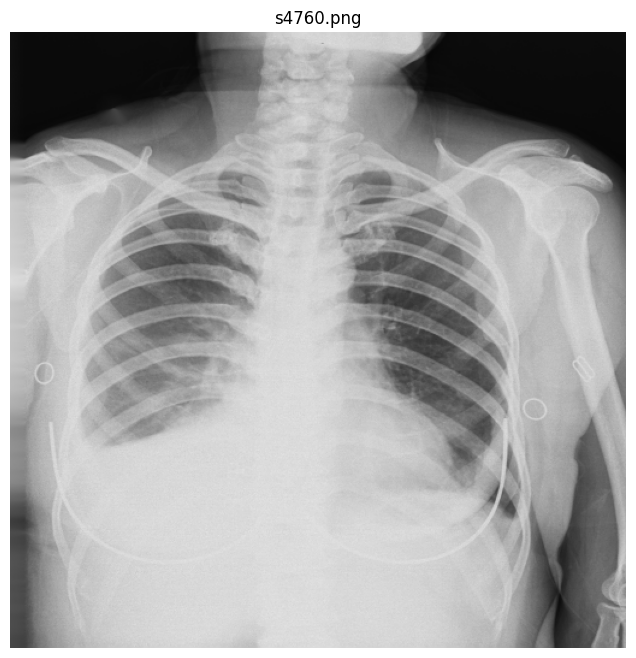

In [14]:
# Find one image
images_dir = TBX11K_PATH / 'tbx11k-simplified' / 'images'
image_files = list(images_dir.glob('*.png'))

if image_files:
    # Load first image
    img_path = image_files[0]
    img = Image.open(img_path)

    print(f"Image: {img_path.name}")
    print(f"Size: {img.size}")
    print(f"Mode: {img.mode}")

    # Display
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray')
    plt.title(img_path.name)
    plt.axis('off')
    plt.show()
else:
    print("No images found")

## Step 14: Check if all images are same size

In [15]:
# Check image sizes from CSV
print("Image sizes in CSV:")
print(f"  Height: {df['image_height'].unique()}")
print(f"  Width: {df['image_width'].unique()}")

# Check actual image size
sample_img = TBX11K_PATH / 'tbx11k-simplified' / 'images' / df.iloc[0]['fname']
if sample_img.exists():
    img = Image.open(sample_img)
    print(f"\nActual first image size: {img.size}")
    print(f"CSV says: {df.iloc[0]['image_width']}x{df.iloc[0]['image_height']}")

Image sizes in CSV:
  Height: [512]
  Width: [512]

Actual first image size: (512, 512)
CSV says: 512x512


## Step 15: Count Images

In [16]:
# Count TBX11K images
train_images = len(list((TBX11K_PATH / 'tbx11k-simplified' / 'images').glob('*.png')))
test_images = len(list((TBX11K_PATH / 'tbx11k-simplified' / 'test').glob('*.png')))

print(f"TBX11K Training: {train_images:,} images")
print(f"TBX11K Test: {test_images:,} images")
print(f"TBX11K Total: {train_images + test_images:,} images")

TBX11K Training: 8,400 images
TBX11K Test: 3,302 images
TBX11K Total: 11,702 images


## Step 16: Check Shenzhen dataset

In [17]:
# List Shenzhen directory
if SHENZHEN_PATH.exists():
    print("Shenzhen folder contents:")
    for item in list(SHENZHEN_PATH.iterdir())[:10]:
        print(f"  {item.name}")

    shenzhen_images = list(SHENZHEN_PATH.rglob('*.png')) + list(SHENZHEN_PATH.rglob('*.jpg'))
    print(f"\nTotal images: {len(shenzhen_images)}")
else:
    print("Shenzhen folder not found")

Shenzhen folder not found


## Step 17: Check Montgomery dataset

In [18]:
# List Montgomery directory
if MONTGOMERY_PATH.exists():
    print("Montgomery folder contents:")
    for item in list(MONTGOMERY_PATH.iterdir())[:10]:
        print(f"  {item.name}")

    montgomery_images = list(MONTGOMERY_PATH.rglob('*.png')) + list(MONTGOMERY_PATH.rglob('*.jpg'))
    print(f"\nTotal images: {len(montgomery_images)}")
else:
    print("Montgomery folder not found")

Montgomery folder not found


## Step 18: Find Shenzhen and Montgomery (check other locations)

In [19]:
# Check if Shenzhen and Montgomery are in a combined folder
combined_path = DATA_ROOT / 'shenzhen_montgomery'

if combined_path.exists():
    print(" Found shenzhen_montgomery folder!")
    print("\nContents:")
    for item in list(combined_path.iterdir())[:10]:
        print(f"  {item.name}")
else:
    print(" shenzhen_montgomery folder not found")

 Found shenzhen_montgomery folder!

Contents:
  ChinaSet_AllFiles
  Montgomery


## Step 19: Find Shenzhen Dataset

In [20]:
# Check for Shenzhen dataset (can be named 'Shenzhen' or 'ChinaSet_AllFiles')
shenzhen_sub = combined_path / 'Shenzhen'
chinaSet_sub = combined_path / 'ChinaSet_AllFiles'

if shenzhen_sub.exists():
    print(" Found Shenzhen subfolder (named 'Shenzhen')")
    shenzhen_images = list(shenzhen_sub.rglob('*.png')) + list(shenzhen_sub.rglob('*.jpg'))
    print(f"   Images: {len(shenzhen_images)}")
elif chinaSet_sub.exists():
    print(" Found Shenzhen subfolder (named 'ChinaSet_AllFiles')")
    print("   Note: 'ChinaSet_AllFiles' is the Shenzhen dataset")
    shenzhen_images = list(chinaSet_sub.rglob('*.png')) + list(chinaSet_sub.rglob('*.jpg'))
    print(f"   Images: {len(shenzhen_images)}")
else:
    print("  Shenzhen folder not found")

 Found Shenzhen subfolder (named 'ChinaSet_AllFiles')
   Note: 'ChinaSet_AllFiles' is the Shenzhen dataset
   Images: 662


## Step 20: Find Montgomery Dataset

In [21]:
# Check for Montgomery dataset
montgomery_sub = combined_path / 'Montgomery'

if montgomery_sub.exists():
    print(" Found Montgomery subfolder")
    montgomery_images = list(montgomery_sub.rglob('*.png')) + list(montgomery_sub.rglob('*.jpg'))
    print(f"   Images: {len(montgomery_images)}")
else:
    print("  Montgomery folder not found")

 Found Montgomery subfolder
   Images: 414


## Step 21: Visualize image with bounding box (if available)

In [22]:
# Find images with bounding boxes
rows_with_bbox = df[df['bbox'] != 'none']

# Try to show image with bbox, otherwise show TB-positive image
if len(rows_with_bbox) > 0:
    # Use image with bbox
    sample_row = rows_with_bbox.iloc[0]
    img_name = sample_row['fname']
    print(f"Image: {img_name}")
    print(f"Bbox: {sample_row['bbox']}")
    print(f"Target: {sample_row['target']}, TB Type: {sample_row['tb_type']}")
else:
    # Fallback to TB-positive image
    print("No images with bbox found. Showing TB-positive image instead:")
    tb_images = df[df['target'] == 'tb']
    sample_row = tb_images.iloc[0]
    img_name = sample_row['fname']
    print(f"Image: {img_name}")
    print(f"Target: {sample_row['target']}, TB Type: {sample_row['tb_type']}")

Image: tb0005.png
Bbox: {'xmin': 381.8337097167969, 'ymin': 126.8733901977539, 'width': 40.236907958984375, 'height': 44.565773010253906}
Target: tb, TB Type: active_tb


 Bbox drawn: x=381.8, y=126.9, w=40.2, h=44.6


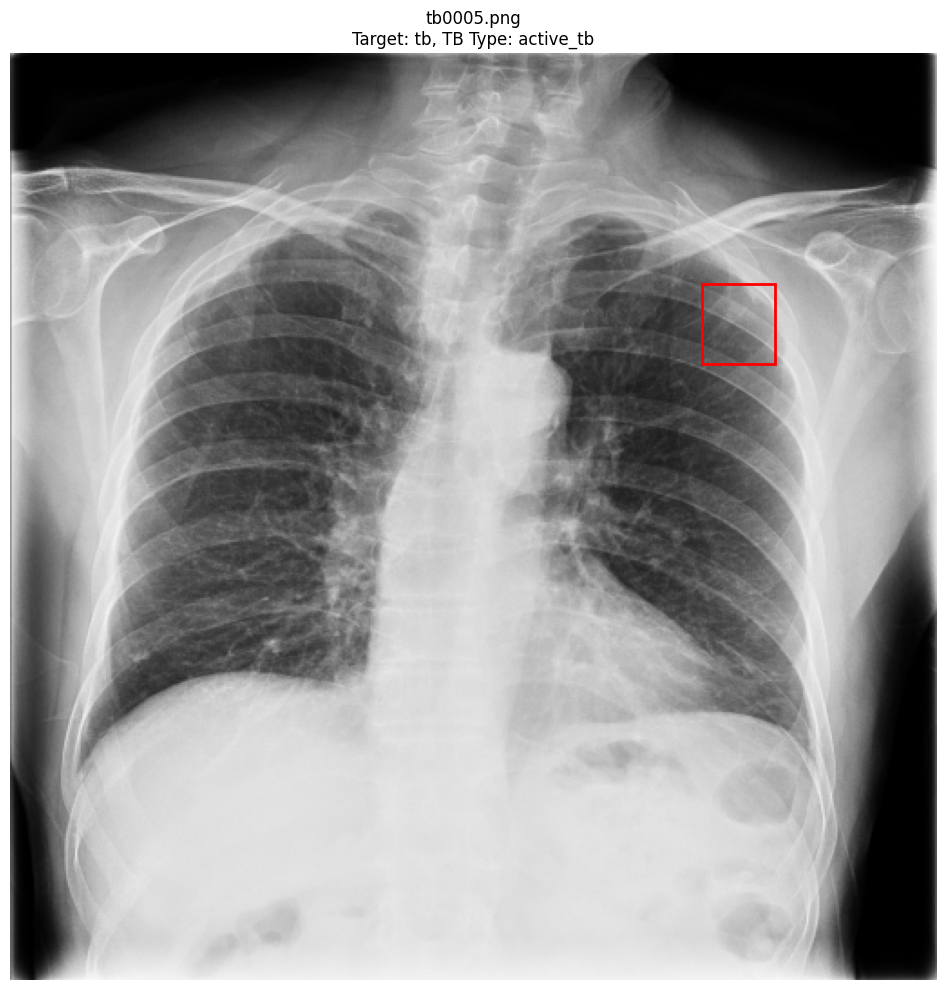

In [23]:
# Load and display the image with bounding box
import ast
from matplotlib.patches import Rectangle

img_path = TBX11K_PATH / 'tbx11k-simplified' / 'images' / img_name

if img_path.exists():
    img = Image.open(img_path)

    # Convert to numpy array for drawing
    img_array = np.array(img)

    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap='gray')
    ax.set_title(f"{img_name}\nTarget: {sample_row['target']}, TB Type: {sample_row['tb_type']}", fontsize=12)
    ax.axis('off')

    # Draw bounding box if available
    if len(rows_with_bbox) > 0 and sample_row['bbox'] != 'none':
        try:
            bbox_str = sample_row['bbox']
            bbox_dict = ast.literal_eval(bbox_str) if isinstance(bbox_str, str) else bbox_str

            xmin = bbox_dict['xmin']
            ymin = bbox_dict['ymin']
            width = bbox_dict['width']
            height = bbox_dict['height']

            # Draw rectangle (bbox)
            rect = Rectangle((xmin, ymin), width, height,
                           linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)

            print(f" Bbox drawn: x={xmin:.1f}, y={ymin:.1f}, w={width:.1f}, h={height:.1f}")
        except Exception as e:
            print(f"  Could not draw bbox: {e}")

    plt.tight_layout()
    plt.show()
else:
    print(f" Image not found: {img_path}")

## Step 22: Data Quality Checks


In [24]:
# Check if all CSV entries have corresponding images in TRAINING folder
# Note: Test folder images are separate and not in CSV
print("Checking data quality...")
print("=" * 60)
print("Note: Only checking training folder (images/), not test folder")
print("      Test folder is separate and images are not in CSV\n")

# Check for missing images in training folder only
missing_images = []
training_folder = TBX11K_PATH / 'tbx11k-simplified' / 'images'

for idx, row in df.iterrows():
    img_path = training_folder / row['fname']
    if not img_path.exists():
        missing_images.append(row['fname'])

if missing_images:
    print(f" Missing images in training folder: {len(missing_images)} files")
    print(f"   First 5: {missing_images[:5]}")
else:
    print(f" All CSV entries have corresponding images in training folder")

# Check for duplicate filenames
duplicates = df['fname'].duplicated().sum()
if duplicates > 0:
    print(f"Duplicate filenames: {duplicates}")
else:
    print(f"No duplicate filenames in CSV")

# Check for null values
null_counts = df.isnull().sum()
if null_counts.sum() > 0:
    print(f"\n  Null values found:")
    print(null_counts[null_counts > 0])
else:
    print(f"No null values in CSV")


Checking data quality...
Note: Only checking training folder (images/), not test folder
      Test folder is separate and images are not in CSV

 All CSV entries have corresponding images in training folder
Duplicate filenames: 412
No null values in CSV


In [26]:
# Check CSV vs actual image counts
print("\nCSV vs Actual Image Counts:")
print("=" * 60)

csv_rows = len(df)
train_images_actual = len(list((TBX11K_PATH / 'tbx11k-simplified' / 'images').glob('*.png')))
test_images_actual = len(list((TBX11K_PATH / 'tbx11k-simplified' / 'test').glob('*.png')))

print(f"CSV rows: {csv_rows:,}")
print(f"Training images in folder (images/): {train_images_actual:,}")
print(f"Test images in folder (test/): {test_images_actual:,}")
print(f"Total images: {train_images_actual + test_images_actual:,}")

# Check if test images are in CSV (they shouldn't be)
test_files = [f.name for f in (TBX11K_PATH / 'tbx11k-simplified' / 'test').glob('*.png')]
test_in_csv = df[df['fname'].isin(test_files)]

print(f"\nTest images in CSV: {len(test_in_csv):,} out of {len(test_files):,}")

if len(test_in_csv) == 0:
    print(f"  Expected: Test folder is separate - images are not in CSV")
    print(f"  Test images will be used for final evaluation (no labels needed)")
else:
    print(f"  Unexpected: {len(test_in_csv)} test images found in CSV")



CSV vs Actual Image Counts:
CSV rows: 8,811
Training images in folder (images/): 8,400
Test images in folder (test/): 3,302
Total images: 11,702

Test images in CSV: 0 out of 3,302
  Expected: Test folder is separate - images are not in CSV
  Test images will be used for final evaluation (no labels needed)


In [27]:
# Check train/val split relationship
print("\nTrain/Val Split Analysis:")
print("=" * 60)

if 'source' in df.columns:
    train_count = len(df[df['source'] == 'train'])
    val_count = len(df[df['source'] == 'val'])

    print(f"Train rows in CSV: {train_count:,}")
    print(f"Val rows in CSV: {val_count:,}")
    print(f"Total CSV rows: {train_count + val_count:,}")
    print(f"\nTraining images in folder (images/): {train_images_actual:,}")
    print(f"Test images in folder (test/): {test_images_actual:,}")

    print(f"\n  Understanding:")
    print(f"   - CSV contains train/val split (for model training)")
    print(f"   - 'val' in CSV = validation set (used during training)")
    print(f"   - Test folder (test/) = separate unlabeled test set (for final evaluation)")
    print(f"   - Test images are NOT in CSV (intentionally separate)")



Train/Val Split Analysis:
Train rows in CSV: 6,902
Val rows in CSV: 1,909
Total CSV rows: 8,811

Training images in folder (images/): 8,400
Test images in folder (test/): 3,302

  Understanding:
   - CSV contains train/val split (for model training)
   - 'val' in CSV = validation set (used during training)
   - Test folder (test/) = separate unlabeled test set (for final evaluation)
   - Test images are NOT in CSV (intentionally separate)


## Step 23: Investigate Duplicate Filenames (Priority 1)


In [28]:
# Find which filenames are duplicated
duplicated_fnames = df[df['fname'].duplicated(keep=False)]['fname'].unique()

print(f"Total unique filenames with duplicates: {len(duplicated_fnames)}")
print(f"Total duplicate rows: {df['fname'].duplicated().sum()}")

# Show first 10 duplicated filenames and their rows
print("\nFirst 10 duplicated filenames:")
print("=" * 60)

for fname in duplicated_fnames[:10]:
    rows = df[df['fname'] == fname]
    print(f"\nFilename: {fname}")
    print(f"  Count: {len(rows)}")
    print(f"  Rows:")
    for idx, row in rows.iterrows():
        print(f"    Row {idx}: source={row['source']}, target={row['target']}, tb_type={row['tb_type']}")


Total unique filenames with duplicates: 382
Total duplicate rows: 412

First 10 duplicated filenames:

Filename: tb0007.png
  Count: 2
  Rows:
    Row 7601: source=train, target=tb, tb_type=latent_tb
    Row 7602: source=train, target=tb, tb_type=latent_tb

Filename: tb0020.png
  Count: 2
  Rows:
    Row 7606: source=train, target=tb, tb_type=active_tb
    Row 7607: source=train, target=tb, tb_type=active_tb

Filename: tb0021.png
  Count: 2
  Rows:
    Row 7608: source=train, target=tb, tb_type=active_tb
    Row 7609: source=train, target=tb, tb_type=active_tb

Filename: tb0030.png
  Count: 2
  Rows:
    Row 7613: source=train, target=tb, tb_type=active_tb
    Row 7614: source=train, target=tb, tb_type=active_tb

Filename: tb0034.png
  Count: 2
  Rows:
    Row 7616: source=train, target=tb, tb_type=active_tb
    Row 7617: source=train, target=tb, tb_type=active_tb

Filename: tb0042.png
  Count: 2
  Rows:
    Row 7621: source=train, target=tb, tb_type=active_tb
    Row 7622: source=trai

In [29]:
# Analyze duplicate patterns
print("Duplicate Pattern Analysis:")
print("=" * 60)

# Group by filename and count occurrences
dup_analysis = df[df['fname'].duplicated(keep=False)].groupby('fname').agg({
    'source': lambda x: list(x),
    'target': lambda x: list(x),
    'tb_type': lambda x: list(x)
}).reset_index()

# Check if duplicates have different labels
print(f"Total filenames with duplicates: {len(dup_analysis)}")
print(f"\nChecking if duplicates have different labels...")

different_labels = 0
same_labels = 0

for idx, row in dup_analysis.iterrows():
    targets = row['target']
    if len(set(targets)) > 1:  # Different labels
        different_labels += 1
    else:
        same_labels += 1

print(f"  Duplicates with different labels: {different_labels}")
print(f"  Duplicates with same labels: {same_labels}")

# Check source distribution in duplicates
print(f"\nSource distribution in duplicates:")
dup_sources = df[df['fname'].duplicated(keep=False)]['source'].value_counts()
print(dup_sources)


Duplicate Pattern Analysis:
Total filenames with duplicates: 382

Checking if duplicates have different labels...
  Duplicates with different labels: 0
  Duplicates with same labels: 382

Source distribution in duplicates:
source
train    584
val      210
Name: count, dtype: int64


## Step 24: Investigate Test Images (Priority 1)


In [32]:
# Test folder is separate from CSV (this is expected)
test_folder = TBX11K_PATH / 'tbx11k-simplified' / 'test'
test_image_files = list(test_folder.glob('*.png'))
test_filenames = [f.name for f in test_image_files]

print(f"Test Folder Analysis:")
print("=" * 60)
print(f"Test folder images: {len(test_filenames):,}")
print(f"CSV rows: {len(df):,}")

# Check if test images exist in CSV (they shouldn't)
test_in_csv = df[df['fname'].isin(test_filenames)]

print(f"\nTest images in CSV: {len(test_in_csv):,}")
print(f"Test images NOT in CSV: {len(test_filenames) - len(test_in_csv):,}")

if len(test_in_csv) == 0:
    print(f"\n  Expected: Test folder is separate")
    print(f"  - Test images are not labeled in CSV")
    print(f"  - Will be used for final evaluation (segmentation only)")
else:
    print(f"\n  Unexpected: {len(test_in_csv)} test images found in CSV")

# Show sample test filenames
print(f"\nSample test filenames (first 10):")
for fname in test_filenames[:10]:
    print(f"  {fname}")


Test Folder Analysis:
Test folder images: 3,302
CSV rows: 8,811

Test images in CSV: 0
Test images NOT in CSV: 3,302

  Expected: Test folder is separate
  - Test images are not labeled in CSV
  - Will be used for final evaluation (segmentation only)

Sample test filenames (first 10):
  unknown_3041.png
  unknown_31.png
  unknown_3092.png
  unknown_3072.png
  unknown_3032.png
  unknown_2998.png
  unknown_2995.png
  unknown_3002.png
  unknown_3036.png
  unknown_3014.png


In [33]:
# Analyze test image filename pattern
print("\nTest Image Filename Pattern:")
print("=" * 60)

# Check naming patterns
print(f"\nSample test filenames:")
print(test_filenames[:20])

# Check if they start with specific prefixes
prefixes = {}
for fname in test_filenames:
    prefix = fname.split('_')[0] if '_' in fname else fname[:5]
    prefixes[prefix] = prefixes.get(prefix, 0) + 1

print(f"\nFilename prefixes in test folder:")
for prefix, count in sorted(prefixes.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"  {prefix}: {count}")

# Verify test images are truly separate from CSV
print(f"\nVerifying test images are separate from CSV:")
csv_fnames = set(df['fname'].tolist())
test_fnames_set = set(test_filenames)

overlap = csv_fnames.intersection(test_fnames_set)
print(f"  Overlapping filenames: {len(overlap)}")

if len(overlap) == 0:
    print(f"   Confirmed: Test folder is completely separate from CSV")
else:
    print(f"   {len(overlap)} test images also found in CSV")



Test Image Filename Pattern:

Sample test filenames:
['unknown_3041.png', 'unknown_31.png', 'unknown_3092.png', 'unknown_3072.png', 'unknown_3032.png', 'unknown_2998.png', 'unknown_2995.png', 'unknown_3002.png', 'unknown_3036.png', 'unknown_3014.png', 'unknown_305.png', 'unknown_3108.png', 'unknown_2972.png', 'unknown_3061.png', 'unknown_3028.png', 'unknown_2957.png', 'unknown_3049.png', 'unknown_3008.png', 'unknown_2990.png', 'unknown_3085.png']

Filename prefixes in test folder:
  unknown: 3302

Verifying test images are separate from CSV:
  Overlapping filenames: 0
   Confirmed: Test folder is completely separate from CSV


In [35]:
# Check if test images have annotation files (they shouldn't - test is unlabeled)
print("\nChecking for annotation files:")
print("=" * 60)

test_folder = TBX11K_PATH / 'tbx11k-simplified' / 'test'

# Look for CSV, JSON, XML, TXT files in test folder
annotation_files = []
for ext in ['.csv', '.json', '.xml', '.txt', '.xlsx']:
    annotation_files.extend(list(test_folder.glob(f'*{ext}')))

if annotation_files:
    print(f"Found annotation files in test folder:")
    for ann_file in annotation_files:
        print(f"  {ann_file.name}")
    print(f"    Unexpected: Test folder should be unlabeled")
else:
    print(f" No annotation files in test folder (expected - test set is unlabeled)")

# Check parent folder for test annotations
parent_folder = TBX11K_PATH / 'tbx11k-simplified'
parent_annotation_files = []
for ext in ['.csv', '.json', '.xml', '.txt']:
    parent_annotation_files.extend(list(parent_folder.glob(f'*test*{ext}')))

if parent_annotation_files:
    print(f"\n Found test-related annotation files in parent folder:")
    for ann_file in parent_annotation_files:
        print(f"  {ann_file.name}")
else:
    print(f"\n No separate test annotation file found (expected)")
    print(f"  Test folder images are unlabeled for final evaluation")



Checking for annotation files:
 No annotation files in test folder (expected - test set is unlabeled)

 No separate test annotation file found (expected)
  Test folder images are unlabeled for final evaluation


## Step 25: Priority 1 Summary


In [37]:
print("=" * 60)
print("PRIORITY 1 INVESTIGATION SUMMARY")
print("=" * 60)

print("\n  DUPLICATE FILENAMES:")
if 'duplicated_fnames' in locals():
    print(f"   Total unique filenames with duplicates: {len(duplicated_fnames)}")
    print(f"   Total duplicate rows: {df['fname'].duplicated().sum()}")
    if 'different_labels' in locals():
        print(f"   Duplicates with different labels: {different_labels}")
        print(f"   Duplicates with same labels: {same_labels}")
        if different_labels == 0:
            print(f"    All duplicates have same labels - safe to deduplicate")

print("\n  TEST IMAGES:")
if 'test_filenames' in locals():
    print(f"   Test folder images: {len(test_filenames):,}")
    if 'test_in_csv' in locals():
        print(f"   Test images in CSV: {len(test_in_csv):,}")
        print(f"   Test images NOT in CSV: {len(test_filenames) - len(test_in_csv):,}")
    if 'overlap' in locals() and len(overlap) == 0:
        print(f"    Confirmed: Test folder is separate (expected)")
        print(f"    Test images will be used for final evaluation (unlabeled)")
    elif 'overlap' in locals():
        print(f"     Overlapping filenames: {len(overlap)} (unexpected)")

print("\n  BBOX VALIDATION:")
if 'invalid_bboxes' in locals():
    print(f"   Valid bboxes: {len(valid_bboxes):,}")
    print(f"   Invalid bboxes: {len(invalid_bboxes):,}")
    if len(invalid_bboxes) > 0:
        print(f"     Action needed: Fix or remove invalid bboxes")
    else:
        print(f"    All bboxes are valid!")

print("\n Investigation complete!")


PRIORITY 1 INVESTIGATION SUMMARY

  DUPLICATE FILENAMES:
   Total unique filenames with duplicates: 382
   Total duplicate rows: 412
   Duplicates with different labels: 0
   Duplicates with same labels: 382
    All duplicates have same labels - safe to deduplicate

  TEST IMAGES:
   Test folder images: 3,302
   Test images in CSV: 0
   Test images NOT in CSV: 3,302
    Confirmed: Test folder is separate (expected)
    Test images will be used for final evaluation (unlabeled)

  BBOX VALIDATION:
   Valid bboxes: 1,211
   Invalid bboxes: 0
    All bboxes are valid!

 Investigation complete!


## Step 26: Final Summary


In [38]:
print("=" * 60)
print("EXPLORATION SUMMARY")
print("=" * 60)

print("\n TBX11K Dataset:")
print(f"   CSV rows: {len(df):,}")
print(f"   Training images (images/ folder): {train_images:,} images")
print(f"   Test images (test/ folder): {test_images:,} images")
print(f"   Total images: {train_images + test_images:,} images")
print(f"   Image size: 512x512 pixels")

print("\n CSV Columns:")
print(f"   {', '.join(df.columns)}")

print("\n  Label Distributions:")
print(f"   Target (tb/no_tb): {df['target'].value_counts().to_dict()}")
print(f"   TB Type: {df['tb_type'].value_counts().to_dict()}")
print(f"   Image Type: {df['image_type'].value_counts().to_dict()}")

rows_with_bbox = df[df['bbox'] != 'none']
print(f"\n Bounding Boxes:")
print(f"   Images with bbox: {len(rows_with_bbox):,}")
print(f"   Images without bbox: {len(df) - len(rows_with_bbox):,}")
if 'valid_bboxes' in locals():
    print(f"   All bboxes validated: ✓ ({len(valid_bboxes):,} valid, {len(invalid_bboxes) if 'invalid_bboxes' in locals() else 0} invalid)")

if 'source' in df.columns:
    print(f"\n Train/Val Split (in CSV):")
    print(f"   Train: {len(df[df['source'] == 'train']):,}")
    print(f"   Val: {len(df[df['source'] == 'val']):,}")

print(f"\n Cross-Dataset Evaluation:")
if 'shenzhen_images' in locals():
    print(f"   Shenzhen: {len(shenzhen_images):,} images")
if 'montgomery_images' in locals():
    print(f"   Montgomery: {len(montgomery_images):,} images")

print(f"\n Key Findings:")
print(f"   1. Test folder is separate from CSV (unlabeled, for final evaluation)")
print(f"   2. {df['fname'].duplicated().sum()} duplicate rows found (all same labels - safe to deduplicate)")
print(f"   3. All {len(rows_with_bbox):,} bounding boxes are valid")
print(f"   4. Average bbox coverage: ~6.22% (small TB lesions)")



EXPLORATION SUMMARY

 TBX11K Dataset:
   CSV rows: 8,811
   Training images (images/ folder): 8,400 images
   Test images (test/ folder): 3,302 images
   Total images: 11,702 images
   Image size: 512x512 pixels

 CSV Columns:
   fname, image_height, image_width, source, bbox, target, tb_type, image_type

  Label Distributions:
   Target (tb/no_tb): {'no_tb': 7600, 'tb': 1211}
   TB Type: {'none': 7600, 'active_tb': 972, 'latent_tb': 239}
   Image Type: {'healthy': 3800, 'sick_but_no_tb': 3800, 'tb': 1211}

 Bounding Boxes:
   Images with bbox: 1,211
   Images without bbox: 7,600
   All bboxes validated: ✓ (1,211 valid, 0 invalid)

 Train/Val Split (in CSV):
   Train: 6,902
   Val: 1,909

 Cross-Dataset Evaluation:
   Shenzhen: 662 images
   Montgomery: 414 images

 Key Findings:
   1. Test folder is separate from CSV (unlabeled, for final evaluation)
   2. 412 duplicate rows found (all same labels - safe to deduplicate)
   3. All 1,211 bounding boxes are valid
   4. Average bbox cover